In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [100]:
dfc=pd.read_csv("/Users/clemence/Downloads/cleaned_data.csv")
dfc.columns

Index(['sessionId', 'kwhTotal', 'dollars', 'created', 'ended', 'startTime',
       'endTime', 'chargeTimeHrs', 'weekday', 'platform', 'userId',
       'stationId', 'locationId', 'managerVehicle', 'facilityType', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'reportedZip'],
      dtype='object')

## Correlations
- correlation matrix with an heatmap  SNS
- correlation scatterplot between chargeTime and dollars SNS
- correlation regplot between chargeTime and kwh (color points according to the manager status vehicle) PLT
- 3D scatterplot PLT relating charge time, energy use (kwh) and amount paid



Text(0.5, 1.0, 'Correlation matrix')

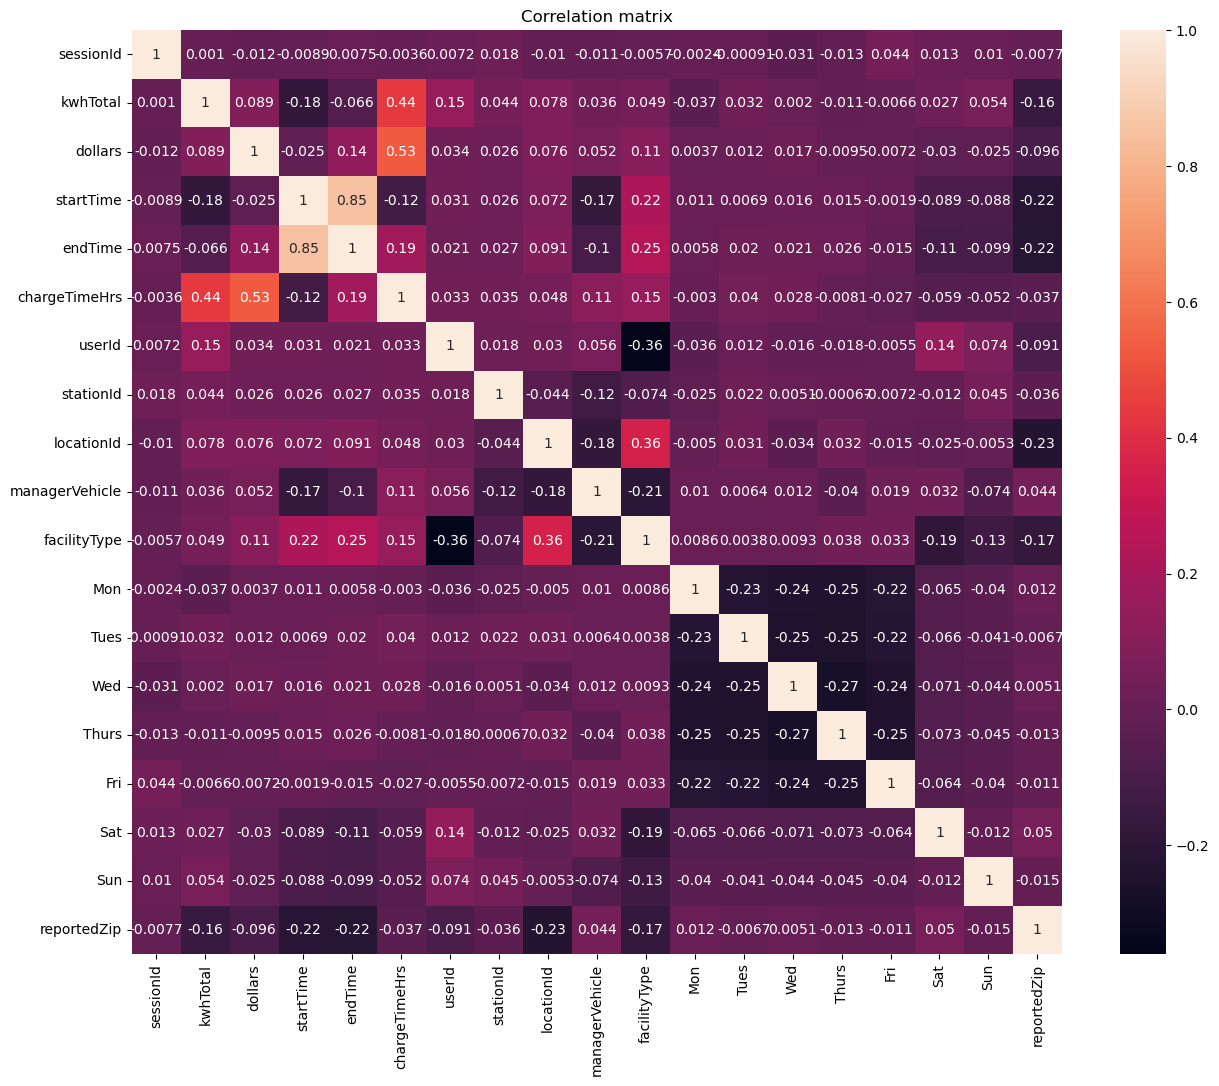

In [5]:
#Let's see a correlation heatmap with SNS
fig=plt.figure(figsize = (15,12))
fig1=sns.heatmap(dfc.corr(),annot=True)
fig1.set_title("Correlation matrix")

The insteresting correlations that shows the heatmap are between chargeTime and dollars, and chargeTime and kwh Total. 

Text(0, 0.5, 'Amount paid (USD)')

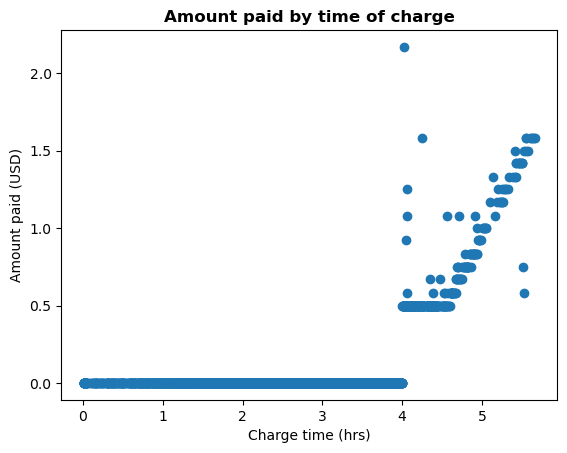

In [57]:
#So we check the correlation between chargeTime and dollars with a scatterplot
plt.scatter("chargeTimeHrs","dollars",data=dfc)
plt.title("Amount paid by time of charge",fontweight='bold')
plt.xlabel("Charge time (hrs)")
plt.ylabel("Amount paid (USD)")

This regplot shows that there is a correlation but only after 4 hours of charge. 
Before 4 hours, the charge is free. After, the amount paid increases when the time of charge increases.  

Text(0, 0.5, 'Total energy use (kwh)')

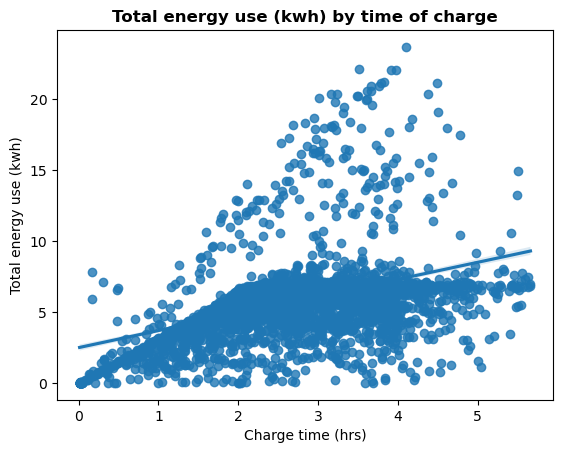

In [26]:
#Let's the correlation between chargeTime and kwh with a plt scatterplot
fig=sns.regplot(dfc["chargeTimeHrs"], dfc["kwhTotal"])
fig.set_title("Total energy use (kwh) by time of charge",fontweight='bold')
fig.set_xlabel("Charge time (hrs)")
fig.set_ylabel("Total energy use (kwh)")

In [ ]:
#There is a small positive correlation between charge time and total energy use but we can think that other factors impact this relation as the type of vehicle for example, but we don't have this data in our data set. 

Text(44.28812422839505, 0.5, 'Total energy use (kwh)')

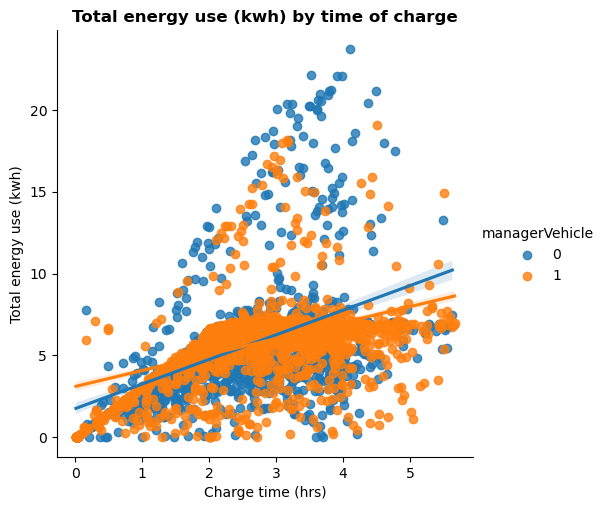

In [44]:
#We can specify the managerial status in this scatterplot. 
fig=sns.lmplot(data=dfc,x="chargeTimeHrs", y="kwhTotal",hue="managerVehicle")
plt.title("Total energy use (kwh) by time of charge",fontweight='bold')
plt.xlabel("Charge time (hrs)")
plt.ylabel("Total energy use (kwh)")

In [ ]:
#There is no notable difference between manager vehicles and non-manager vehicles in the energy use by time of charge. 

Text(0.5, 0, 'Energy use (kwh)')

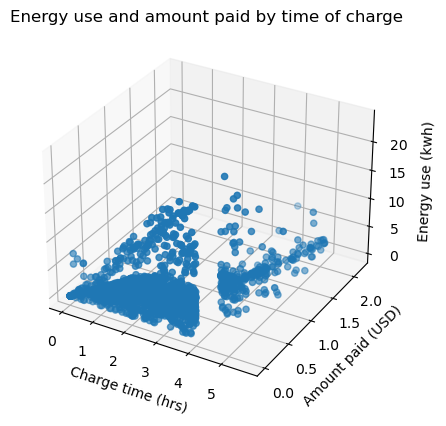

In [62]:
#We can complete the analysis of correlations by looking a 3D plot linking the charge time, tje use of energy and the dollars paid. 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(dfc["chargeTimeHrs"], dfc["dollars"], dfc["kwhTotal"])
ax.set_title("Energy use and amount paid by time of charge")
ax.set_xlabel('Charge time (hrs)')
ax.set_ylabel('Amount paid (USD)')
ax.set_zlabel('Energy use (kwh)')

Text(0.5, 0, 'Energy use (kwh)')

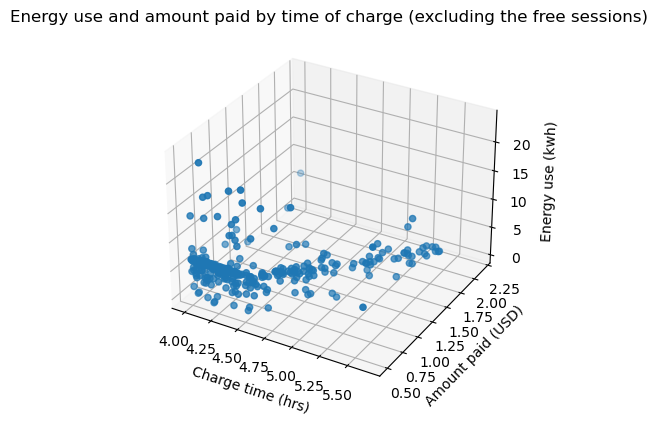

In [61]:
#We want the same graph excluding the free sessions of charge. 
dfc_paid=dfc[dfc["dollars"]>0]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(dfc_paid["chargeTimeHrs"], dfc_paid["dollars"], dfc_paid["kwhTotal"])
ax.set_title("Energy use and amount paid by time of charge (excluding the free sessions)")
ax.set_xlabel('Charge time (hrs)')
ax.set_ylabel('Amount paid (USD)')
ax.set_zlabel('Energy use (kwh)')


## Analysis of the amount paid 
- line plot with amount paid & kwh SNS
- line plot with amount paid & charge time SNS


Text(0, 0.5, 'Energy use (kwh)')

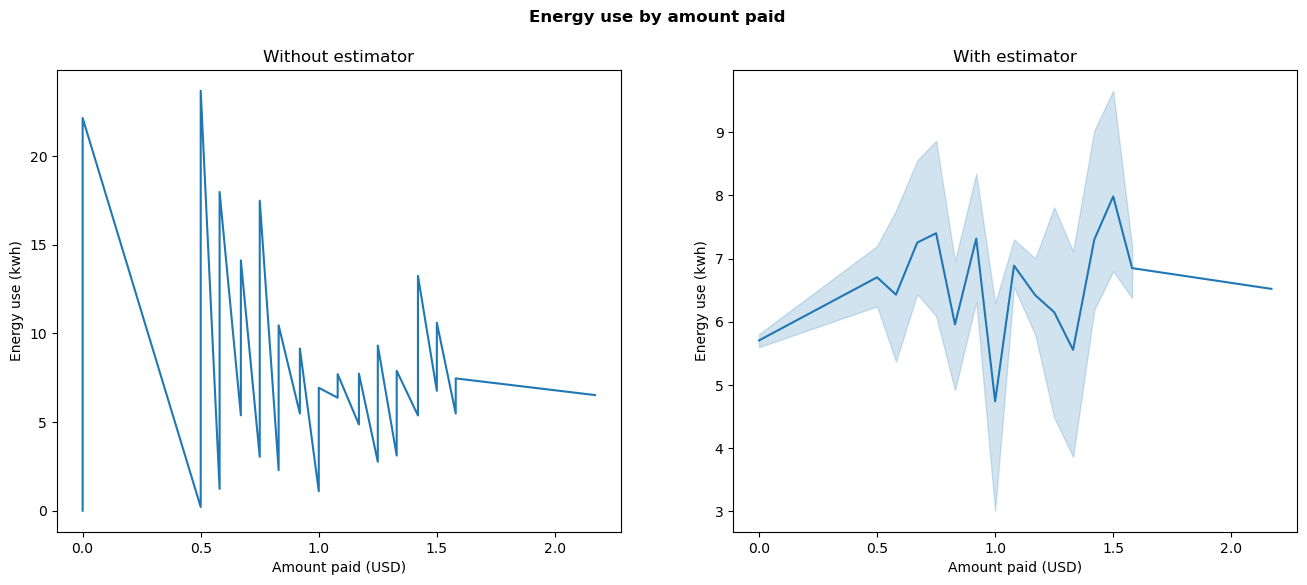

In [87]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.suptitle("Energy use by amount paid",fontweight="bold")
sns.lineplot(data=dfc,x="dollars",y="kwhTotal",ax=ax[0],estimator=None)
ax[0].set_title("Without estimator")
ax[0].set_xlabel("Amount paid (USD)")
ax[0].set_ylabel("Energy use (kwh)")
sns.lineplot(data=dfc,x="dollars",y="kwhTotal",ax=ax[1])
ax[1].set_title("With estimator")
ax[1].set_xlabel("Amount paid (USD)")
ax[1].set_ylabel("Energy use (kwh)")


In [ ]:
#We can see with these plots that there is no relation between the amount paid and the total of energy use in the charge. Even the "estimator" parameter doesn't allow us to see a tendancy. 

Text(0, 0.5, 'Time of charge (hrs)')

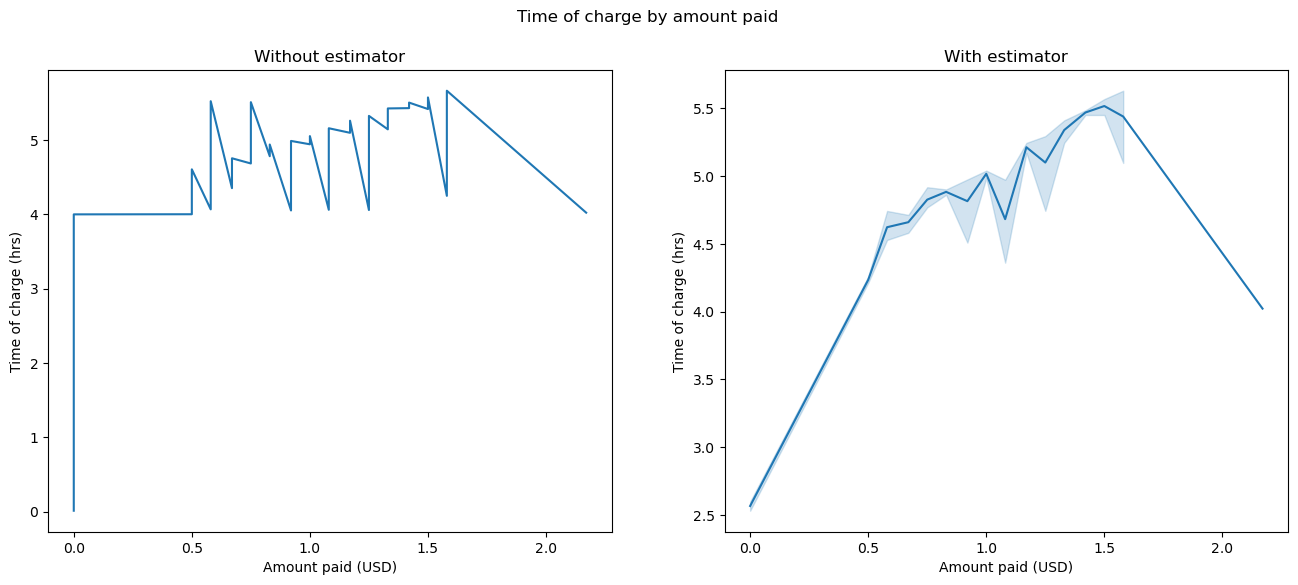

In [88]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.suptitle("Time of charge by amount paid")
sns.lineplot(data=dfc,x="dollars",y="chargeTimeHrs",ax=ax[0],estimator=None)
ax[0].set_title("Without estimator")
ax[0].set_xlabel("Amount paid (USD)")
ax[0].set_ylabel("Time of charge (hrs)")
sns.lineplot(data=dfc,x="dollars",y="chargeTimeHrs",ax=ax[1])
ax[1].set_title("With estimator")
ax[1].set_xlabel("Amount paid (USD)")
ax[1].set_ylabel("Time of charge (hrs)")

In [89]:
#These subplots show that the free charges last all less than 4 hours. After there is a positive correlation.  

## Analysis of stations 
#### Number of stations per location Treemap PLT


In [95]:
#Let's see which location are the most importants in terms of number of stations with a treemap

In [94]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [220]:
numbers_station=dfc["stationId"].groupby(dfc["locationId"]).nunique().sort_values()
numbers_station

locationId
572514     1
310085     1
454147     1
747048     1
948590     2
878393     2
751082     2
700367     2
125372     2
493904     2
517854     3
814002     3
978130     3
503205     4
566549     4
620906     4
481066     4
399399     4
868085     6
202527     6
144857     6
976902     8
928191     8
461655    12
648339    14
Name: stationId, dtype: int64

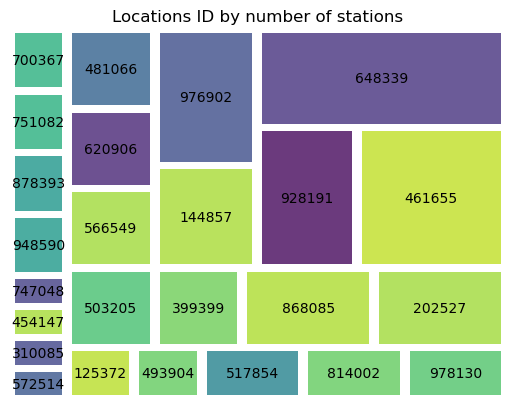

In [221]:
import squarify
squarify.plot(sizes=numbers_station, label=numbers_station.index, alpha=.8 , pad=2) 
plt.axis('off')
plt.title("Locations ID by number of stations")
plt.show()

In [122]:
#We have 5 locations that are more importants in terms of numbers of stations. 

#### Number of sessions per stations (top 10) bar chart SNS

In [131]:
#Let's see now the stations where there are the more number of sessions of charge. 
#We first create a dataframe to select the ten most important sessions in terms of number of sessions. 
dfc_station= dfc.groupby("stationId").count().sort_values("sessionId",ascending=False).head(10)
dfc_station

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
stationId,,,,,,,,,,,,,,,,,,,,,
369001,332,332,332,332,332,332,332,332,332,332,...,332,332,332,332,332,332,332,332,332,332
474204,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212
955429,189,189,189,189,189,189,189,189,189,189,...,189,189,189,189,189,189,189,189,189,189
228137,99,99,99,99,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99
250527,89,89,89,89,89,89,89,89,89,89,...,89,89,89,89,89,89,89,89,89,89
878706,87,87,87,87,87,87,87,87,87,87,...,87,87,87,87,87,87,87,87,87,87
944515,83,83,83,83,83,83,83,83,83,83,...,83,83,83,83,83,83,83,83,83,83
207262,79,79,79,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79
664306,69,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69


Text(0, 0.5, 'Number of sessions')

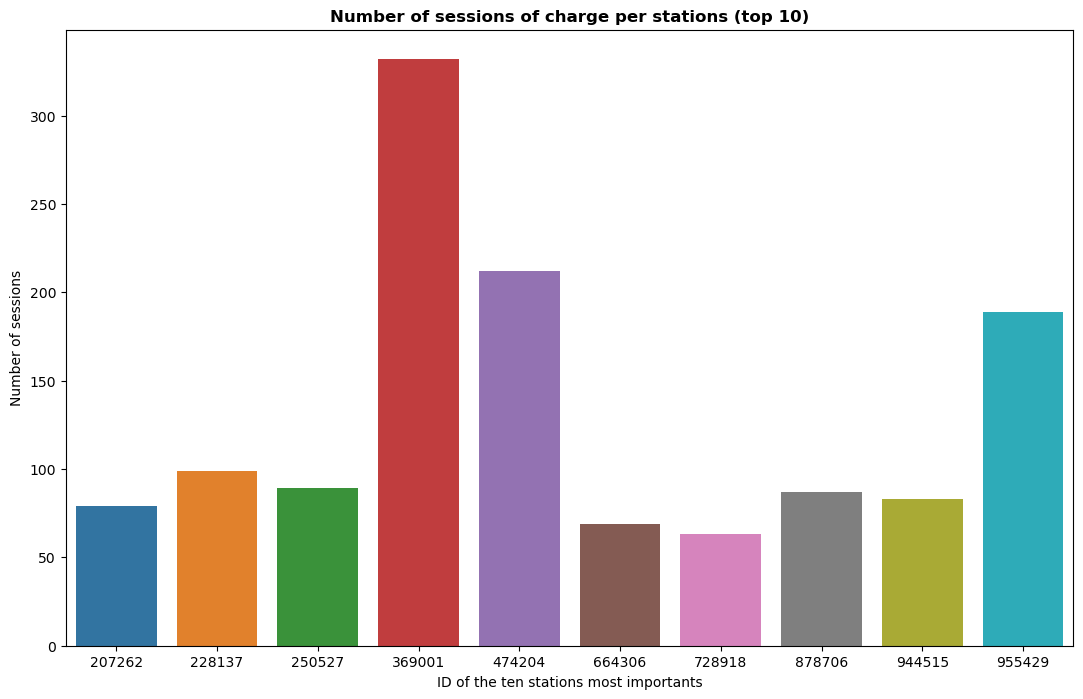

In [151]:
fig=plt.figure(figsize = (13,8))
fig=sns.barplot(data=dfc_station,x=dfc_station.index,y="sessionId")
fig.set_title("Number of sessions of charge per stations (top 10)",fontweight="bold")
fig.set_xlabel("ID of the ten stations most importants")
fig.set_ylabel("Number of sessions")

In [152]:
#This graph shows clearly three big stations with an important number of sessions of charges. 

#### Daily average sessions per stations (top 10) stacked bar chart PLT

In [182]:
#We want to see the average of number of sessions per day for the ten most important stations. 
list_of_values = dfc_station.index
dfc_station2 = dfc[dfc['stationId'].isin(list_of_values)]

In [183]:
dfc_station2

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
9,8490014,1.98,0.0,0014-12-18 18:06:49,0014-12-18 18:30:05,18,18,0.387778,Thu,android,...,0,3,0,0,0,1,0,0,0,0
17,4716378,5.38,0.0,0015-01-21 18:01:25,0015-01-21 20:19:04,18,20,2.294167,Wed,android,...,0,3,0,0,1,0,0,0,0,0
23,5011218,4.65,0.0,0015-02-16 13:42:45,0015-02-16 15:13:05,13,15,1.505556,Mon,android,...,0,3,1,0,0,0,0,0,0,0
24,8554662,6.29,0.0,0015-02-16 18:36:12,0015-02-16 21:43:05,18,21,3.114722,Mon,android,...,0,3,1,0,0,0,0,0,0,0
25,8052184,3.10,0.0,0015-02-19 15:43:20,0015-02-19 16:19:05,15,16,0.595833,Thu,android,...,0,3,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277,5007810,13.08,0.0,0015-09-29 12:42:15,0015-09-29 15:59:08,12,15,3.281389,Tue,ios,...,1,3,0,1,0,0,0,0,0,1
3278,9662307,9.84,0.0,0015-09-30 19:37:45,0015-09-30 21:41:07,19,21,2.056111,Wed,ios,...,1,3,0,0,1,0,0,0,0,1
3286,6320912,4.33,0.0,0015-10-02 16:59:45,0015-10-02 19:11:06,16,19,2.189167,Fri,ios,...,1,3,0,0,0,0,1,0,0,1
3324,1781196,6.94,0.5,0015-10-02 11:27:08,0015-10-02 15:49:06,11,15,4.366111,Fri,ios,...,1,3,0,0,0,0,1,0,0,1


In [185]:
dfc_station2["stationId"].value_counts()

369001    332
474204    212
955429    189
228137     99
250527     89
878706     87
944515     83
207262     79
664306     69
728918     63
Name: stationId, dtype: int64

In [306]:
pivot=pd.crosstab(dfc_station2["stationId"], dfc_station2["weekday"],margins=False)
pivot

weekday,Fri,Mon,Sat,Sun,Thu,Tue,Wed
stationId,,,,,,,
207262,13,13,0,0,19,15,19
228137,17,21,0,0,16,23,22
250527,20,19,4,0,19,13,14
369001,56,58,31,5,58,61,63
474204,32,41,0,0,52,43,44
664306,16,10,0,0,17,14,12
728918,5,14,0,0,20,16,8
878706,17,14,0,0,22,18,16
944515,16,16,1,0,13,22,15


In [311]:
pivot=pivot.reset_index(drop=False)

In [312]:
pivot["stationId"]=pivot["stationId"].astype(str)

In [313]:
pivot.dtypes

weekday
stationId    object
Fri           int64
Mon           int64
Sat           int64
Sun           int64
Thu           int64
Tue           int64
Wed           int64
dtype: object

(array([6., 1., 0., 0., 1., 1., 0., 0., 0., 1.]),
 array([ 63. ,  89.9, 116.8, 143.7, 170.6, 197.5, 224.4, 251.3, 278.2,
        305.1, 332. ]),
 <BarContainer object of 10 artists>)

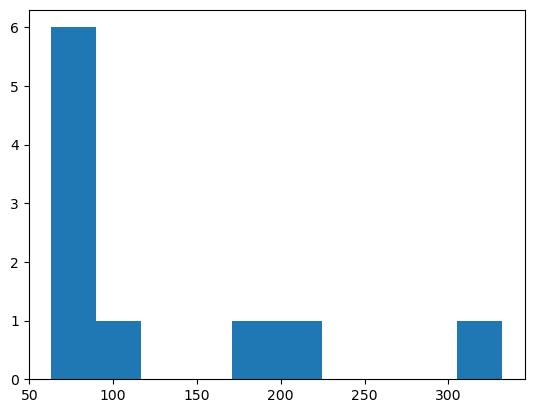

In [329]:
#not working
plt.hist(dfc_station2["stationId"].value_counts(), histtype='bar', stacked=True, label=dfc_station2["weekday"])

Text(0.5, 1.0, 'Number of charging sessions in the most important stations per weekdays')

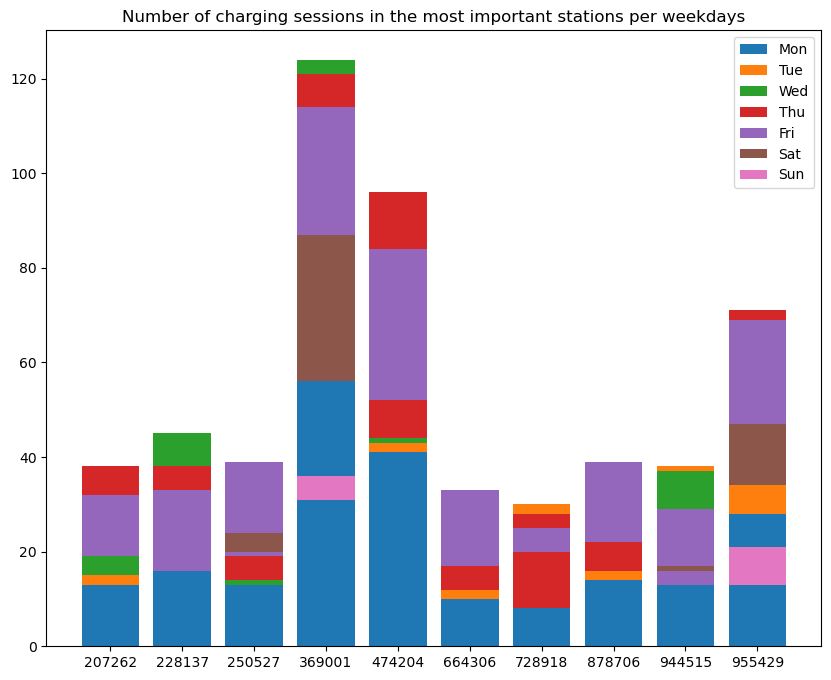

In [314]:
#best way but not really working
fig=plt.figure(figsize = (10,8))
plt.bar(pivot["stationId"],pivot["Mon"], label="Mon")
plt.bar(pivot["stationId"],pivot["Tue"], bottom=pivot["Mon"],label="Tue")
plt.bar(pivot["stationId"],pivot["Wed"], bottom=pivot["Tue"],label="Wed")
plt.bar(pivot["stationId"],pivot["Thu"], bottom=pivot["Wed"],label="Thu")
plt.bar(pivot["stationId"],pivot["Fri"], bottom=pivot["Thu"],label="Fri")
plt.bar(pivot["stationId"],pivot["Sat"], bottom=pivot["Fri"],label="Sat")
plt.bar(pivot["stationId"],pivot["Sun"], bottom=pivot["Sat"],label="Sun")
plt.legend()
plt.title("Number of charging sessions in the most important stations per weekdays")

In [321]:
pivot.set_index("stationId")
pivot_transpose=pivot.T

In [322]:
pivot_transpose

,0,1,2,3,4,5,6,7,8,9
weekday,,,,,,,,,,
stationId,207262,228137,250527,369001,474204,664306,728918,878706,944515,955429
Fri,13,17,20,56,32,16,5,17,16,34
Mon,13,21,19,58,41,10,14,14,16,28
Sat,0,0,4,31,0,0,0,0,1,13
Sun,0,0,0,5,0,0,0,0,0,8
Thu,19,16,19,58,52,17,20,22,13,35
Tue,15,23,13,61,43,14,16,18,22,35
Wed,19,22,14,63,44,12,8,16,15,36


In [317]:
new_columns = pivot_transpose.iloc[0]
pivot_transpose=pd.DataFrame(pivot_transpose.values[1:], columns=new_columns)
pivot_transpose

stationId,207262,228137,250527,369001,474204,664306,728918,878706,944515,955429
0,13,17,20,56,32,16,5,17,16,34
1,13,21,19,58,41,10,14,14,16,28
2,0,0,4,31,0,0,0,0,1,13
3,0,0,0,5,0,0,0,0,0,8
4,19,16,19,58,52,17,20,22,13,35
5,15,23,13,61,43,14,16,18,22,35
6,19,22,14,63,44,12,8,16,15,36


In [330]:
plt.plot(pivot_transpose.index,pivot_transpose["207262"], label="207262")
plt.plot(pivot_transpose.index,pivot_transpose["228137"], label="228137")
plt.plot(pivot_transpose.index,pivot_transpose["250527"], label="250527")
plt.plot(pivot_transpose.index,pivot_transpose["250527"], label="250527")
plt.plot(pivot_transpose.index,pivot_transpose["369001"], label="369001")
plt.plot(pivot_transpose.index,pivot_transpose["474204"], label="474204")
plt.plot(pivot_transpose.index,pivot_transpose["664306"], label="664306")
plt.plot(pivot_transpose.index,pivot_transpose["728918"], label="728918")
plt.plot(pivot_transpose.index,pivot_transpose["878706"], label="878706")
plt.plot(pivot_transpose.index,pivot_transpose["944515"], label="944515")
plt.plot(pivot_transpose.index,pivot_transpose["955429"], label="955429")
plt.legend(loc="upper right")

KeyError: '207262'

## Others diverses insights 
- Number of users using android or ios (pie chart) SNS
- Number of users per facility type (pie chart) SNS
- Number of chargings per facility type (pie chart) SNS


In [213]:
#We want to plot the number of users using android or ios
#We first create a dataframe with the counts
platform= pd.DataFrame(dfc["platform"].value_counts())
platform

,platform
ios,2188
android,1142
web,6


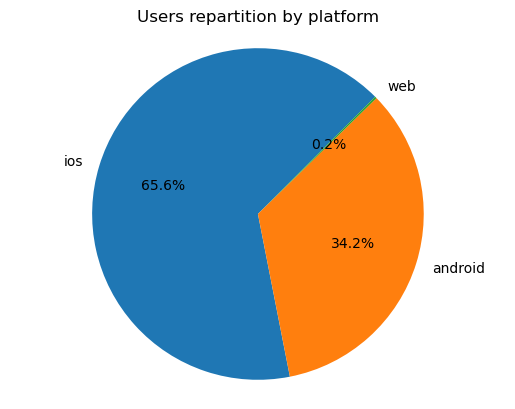

In [325]:
plt.pie(platform["platform"], labels=platform.index, autopct='%1.1f%%', startangle=45)
plt.axis('equal')
plt.title("Users repartition by platform")
plt.show()

In [234]:
#We want the number of users by facility category. 
numbers_user=dfc["userId"].groupby(dfc["facilityType"]).nunique()
numbers_user

facilityType
1    12
2    29
3    58
4     5
Name: userId, dtype: int64

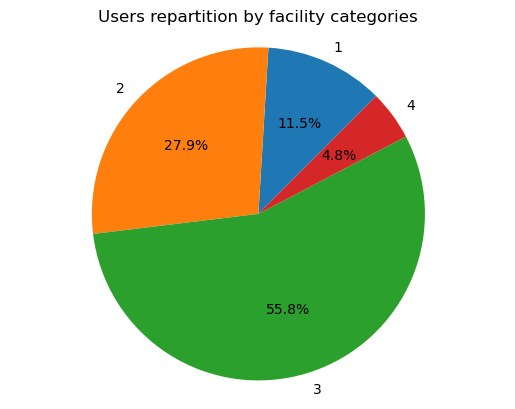

In [235]:
plt.pie(numbers_user, labels=numbers_user.index, autopct='%1.1f%%', startangle=45)
plt.axis('equal')
plt.title("Users repartition by facility categories")
plt.show()

In [232]:
numbers_charges=dfc["sessionId"].groupby(dfc["facilityType"]).count()
numbers_charges

facilityType
1     590
2     846
3    1798
4     102
Name: sessionId, dtype: int64

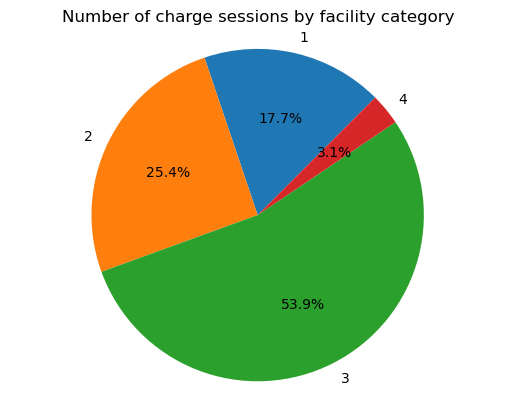

In [233]:

plt.pie(numbers_charges, labels=numbers_charges.index, autopct='%1.1f%%', startangle=45)
plt.axis('equal')
plt.title("Number of charge sessions by facility category")
plt.show()

In [229]:
#The two last graphs are coherents. 